# Tarefa 5: invocar modelo do Bedrock para geração de código

Neste caderno, você aprenderá a usar um grande modelo de linguagem (LLM) para gerar código com base em um prompt de texto.

O prompt usado nesse caderno é um prompt zero-shot, pois não estamos fornecendo exemplos de texto além do prompt em si.

Para demonstrar a capacidade de geração de código dos modelos no Amazon Bedrock, você usa o caso de uso de geração de código. Você verá como usar o cliente Boto3 para se comunicar com a API do Amazon Bedrock e atribuir uma tarefa à ela, bem como uma instrução e uma entrada, para que o modelo básico gere uma saída sem precisar de um exemplo adicional. Nosso objetivo é demonstrar como os LLMs avançados compreendem facilmente a tarefa apresentada e geram resultados interessantes.


## Cenário

Você é Moe, analista de dados na UmaEmpresa. A empresa quer entender o desempenho de vendas de diferentes produtos ao longo do ano passado. Você recebeu um conjunto de dados chamado sales.cvs. O conjunto de dados contém as seguintes colunas:

- Data no formato DD-MM-AAAA
- ID_Produto (identificador único de cada produto)
- Preço (preço pelo qual cada produto foi vendido)


Neste caderno, você aprenderá a gerar código para um determinado prompt. Você usará o Meta Llama 3 por meio da API do Amazon Bedrock com o cliente Boto3.

## Tarefa 5.1: configuração do ambiente

Nesta tarefa, você configurará o ambiente.


In [1]:
#create a service client by name using the default session.
import json
import os
import sys

import boto3

module_path = ".."
sys.path.append(os.path.abspath(module_path))
bedrock_client = boto3.client('bedrock-runtime',region_name=os.environ.get("AWS_DEFAULT_REGION", None))


## Tarefa 5.2: geração de códigos

Nesta tarefa, você preparará uma entrada no serviço Amazon Bedrock a fim de gerar um programa Python para seu caso de uso.

#### Configuração do laboratório: crie dados de amostra do sales.csv para esse laboratório.



In [2]:
# create sales.csv file
import csv

data = [
    ["date", "product_id", "price", "units_sold"],
    ["2023-01-01", "P001", 50, 20],
    ["2023-01-02", "P002", 60, 15],
    ["2023-01-03", "P001", 50, 18],
    ["2023-01-04", "P003", 70, 30],
    ["2023-01-05", "P001", 50, 25],
    ["2023-01-06", "P002", 60, 22],
    ["2023-01-07", "P003", 70, 24],
    ["2023-01-08", "P001", 50, 28],
    ["2023-01-09", "P002", 60, 17],
    ["2023-01-10", "P003", 70, 29],
    ["2023-02-11", "P001", 50, 23],
    ["2023-02-12", "P002", 60, 19],
    ["2023-02-13", "P001", 50, 21],
    ["2023-02-14", "P003", 70, 31],
    ["2023-03-15", "P001", 50, 26],
    ["2023-03-16", "P002", 60, 20],
    ["2023-03-17", "P003", 70, 33],
    ["2023-04-18", "P001", 50, 27],
    ["2023-04-19", "P002", 60, 18],
    ["2023-04-20", "P003", 70, 32],
    ["2023-04-21", "P001", 50, 22],
    ["2023-04-22", "P002", 60, 16],
    ["2023-04-23", "P003", 70, 34],
    ["2023-05-24", "P001", 50, 24],
    ["2023-05-25", "P002", 60, 21]
]

# Write data to sales.csv
with open('sales.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

print("sales.csv has been created!")

sales.csv has been created!


## Tarefa 5.3: analisar as vendas com o programa Python gerado pelo Amazon Bedrock

In [4]:
# define prompt template
from langchain_core.prompts import PromptTemplate

def format_prompt(actor:str, input:str):
    match actor:
        case "user":
            prompt_template =  """<|begin_of_text|><|start_header_id|>{actor}<|end_header_id|>\n\n{input}<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n
"""
            prompt = PromptTemplate.from_template(prompt_template)
            return prompt.format(actor=actor,input=input)
        case _:
            print("requested actor >" + actor + "< is not supported")
            return ""    

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [5]:
# Create the prompt
# Analyzing sales

prompt_data = """

You have a CSV, sales.csv, with columns:
- date (YYYY-MM-DD)
- product_id
- price
- units_sold

Create a python program to analyze the sales data from a CSV file. The program should be able to read the data, and determine below:

- Total revenue for the year
- Total revenue by product 
- The product with the highest revenue 
- The date with the highest revenue and the revenue achieved on that date
- Visualize monthly sales using a bar chart

Ensure the code is syntactically correct, bug-free, optimized, not span multiple lines unnessarily, and prefer to use standard libraries. Return only python code without any surrounding text, explanation or context.

"""
prompt=format_prompt("user",prompt_data)

In [6]:
body = json.dumps({
    "prompt": prompt,
    "max_gen_len": 2048,
    "temperature": 0,
    "top_p": 1,
    }) 
    

## Tarefa 5.4: invocar o modelo

In [7]:
modelId = "meta.llama3-8b-instruct-v1:0"
response = bedrock_client.invoke_model(body=body, modelId=modelId)
response_body = json.loads(response.get('body').read())
output_list = response_body.get("generation", [])
print(output_list)

```
import csv
import datetime
import matplotlib.pyplot as plt
from collections import defaultdict

def analyze_sales(file_name):
    sales_data = []
    with open(file_name, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            sales_data.append({
                'date': datetime.datetime.strptime(row['date'], '%Y-%m-%d').date(),
                'product_id': row['product_id'],
                'price': float(row['price']),
                'units_sold': int(row['units_sold'])
            })

    total_revenue = sum(sale['price'] * sale['units_sold'] for sale in sales_data)
    print(f'Total revenue for the year: {total_revenue}')

    revenue_by_product = defaultdict(int)
    for sale in sales_data:
        revenue_by_product[sale['product_id']] += sale['price'] * sale['units_sold']
    print('Total revenue by product:')
    for product, revenue in revenue_by_product.items():
        print(f'{product}: {revenue}')

    max_revenue_product = max(reve

##### <i aria-hidden="true" class="far fa-copy"></i> (Opcional) Copie o código gerado pela saída impressa e execute o código gerado pelo Bedrock na célula abaixo para validação.

Total revenue for the year: 35490.0
Total revenue by product:
P001: 11700.0
P002: 8880.0
P003: 14910.0
The product with the highest revenue: P003
The date with the highest revenue: 2023-04-23, Revenue: 2380.0


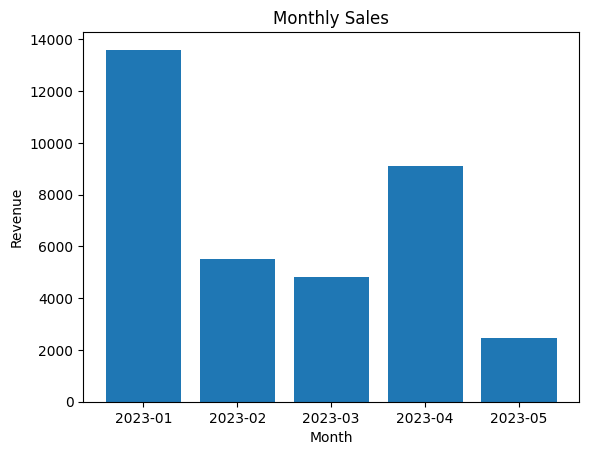

In [9]:
import csv
import datetime
import matplotlib.pyplot as plt
from collections import defaultdict

def analyze_sales(file_name):
    sales_data = []
    with open(file_name, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            sales_data.append({
                'date': datetime.datetime.strptime(row['date'], '%Y-%m-%d').date(),
                'product_id': row['product_id'],
                'price': float(row['price']),
                'units_sold': int(row['units_sold'])
            })

    total_revenue = sum(sale['price'] * sale['units_sold'] for sale in sales_data)
    print(f'Total revenue for the year: {total_revenue}')

    revenue_by_product = defaultdict(int)
    for sale in sales_data:
        revenue_by_product[sale['product_id']] += sale['price'] * sale['units_sold']
    print('Total revenue by product:')
    for product, revenue in revenue_by_product.items():
        print(f'{product}: {revenue}')

    max_revenue_product = max(revenue_by_product, key=revenue_by_product.get)
    print(f'The product with the highest revenue: {max_revenue_product}')

    max_revenue_date = max(sales_data, key=lambda x: x['price'] * x['units_sold'])
    print(f'The date with the highest revenue: {max_revenue_date["date"]}, Revenue: {max_revenue_date["price"] * max_revenue_date["units_sold"]}')

    monthly_sales = defaultdict(int)
    for sale in sales_data:
        monthly_sales[sale['date'].strftime('%Y-%m')] += sale['price'] * sale['units_sold']
    months = list(monthly_sales.keys())
    months.sort()
    plt.bar(months, [monthly_sales[month] for month in months])
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.title('Monthly Sales')
    plt.show()

analyze_sales('sales.csv')



Agora você experimentou o uso do `boto3` SDK, que fornece uma exposição básica à API do Amazon Bedrock. Com essa API, você gera um programa Python para analisar e visualizar determinados dados de vendas.



### Experimente você mesmo

- Altere os prompts para seu caso de uso específico e avalie o resultado de diferentes modelos.
- Teste o comprimento do token para entender a latência e a responsividade do serviço.
- Aplique diferentes princípios de engenharia de prompts para gerar resultados melhores.

### Limpeza

Você concluiu este caderno. Passe para a próxima parte do laboratório da seguinte forma:

- Feche este arquivo de caderno e continue com a **Tarefa 6**